In [27]:
import tensorflow as tf
import keras

import numpy as np
import keras.datasets.mnist as mnist
import matplotlib.pyplot as plt
%matplotlib inline

## Keras and MNIST

https://keras.io/

https://en.wikipedia.org/wiki/MNIST_database

60000 Number of train samples
10000 Number of test samples
x_train shape: (60000, 28, 28)


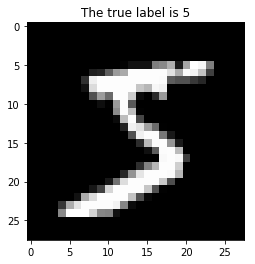

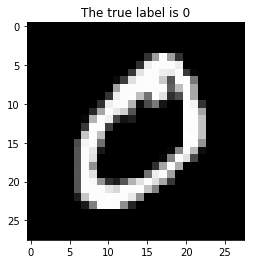

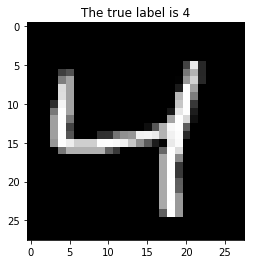

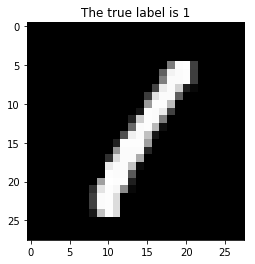

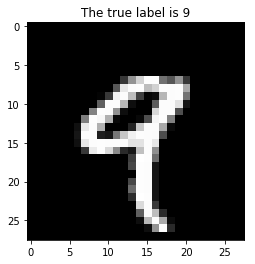

In [28]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape[0], 'Number of train samples')
print(x_test.shape[0], 'Number of test samples')
print('x_train shape:', x_train.shape)

# plot images as gray scale
for image_id in range(0, 5):
    plt.imshow(x_train[image_id], cmap=plt.get_cmap('gray'))
    plt.title("The true label is %s" % str(y_train[image_id]))
    plt.show()

## Overfitting and regularization

Deeper neural networks face the problem of overfitting.

![Overfitting](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/overfitting.png)

In [29]:
# This makes sure the image has the correct order in the axis for Tensorflow, it would be different for Theano backend
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert values to floats, originally they are integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the inputs
x_train /= 255.0  # The image is in grayscale and has values between 0 and 255
x_test /= 255.0

# Convert values of labels from 0 to 9 to categorical (one_hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [30]:
print(x_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000, 10)


A simple way to prevent overfitting is dropout. Dropout randomly removes neurons or connections in the network during training. There are many interpretations of dropout from "robust" representation to Bayesian inference.

https://www.youtube.com/watch?v=vAVOY8frLlQ

http://mlg.eng.cam.ac.uk/yarin/blog_3d801aa532c1ce.html

![Dropout](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/dropout.png)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation

In [32]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Images are a 3D matrix, we have to flatten them to be 1D
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5)) # drop a unit with  50% probability.
model.add(Dense(150, kernel_initializer='orthogonal'))
model.add(Activation('sigmoid'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax')) # last layer, this has a softmax to do the classification

In [78]:
# kernel_initializer is used to initialize the W and B matrices, this can be any random initialization technique

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 150)               30150     
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1510      
Total params: 188,660
Trainable params: 188,660
Non-trainable params: 0
_________________________________________________________________


In [34]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=100, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.5843 - acc: 0.8436 - val_loss: 0.2104 - val_acc: 0.9383
Epoch 2/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.2293 - acc: 0.9321 - val_loss: 0.1466 - val_acc: 0.9573
Epoch 3/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.1747 - acc: 0.9478 - val_loss: 0.1291 - val_acc: 0.9628
Epoch 4/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.1436 - acc: 0.9569 - val_loss: 0.1099 - val_acc: 0.9669
Epoch 5/10
48000/48000 [==============================] - 7s 146us/step - loss: 0.1286 - acc: 0.9611 - val_loss: 0.0969 - val_acc: 0.9703
Epoch 6/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.1113 - acc: 0.9660 - val_loss: 0.0894 - val_acc: 0.9733
Epoch 7/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.1058 - acc: 0.9677 - val_loss: 0.0864 - 

Keys for history object dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


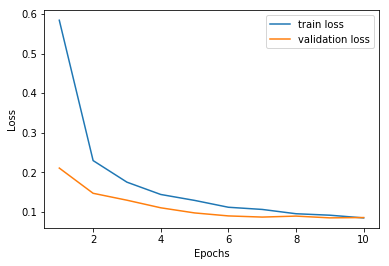

In [36]:
print("Keys for history object", history.history.keys())

train_loss = history.history['loss']
valid_loss = history.history['val_loss']
epochs = list(range(1, len(train_loss)+1))

plt.plot(epochs, train_loss, label="train loss")
plt.plot(epochs, valid_loss, label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

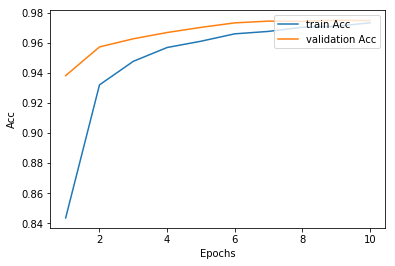

In [48]:
train_loss = history.history['acc']
valid_loss = history.history['val_acc']
epochs = list(range(1, len(train_loss)+1))

plt.plot(epochs, train_loss, label="train Acc")
plt.plot(epochs, valid_loss, label="validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(loc='upper right')
plt.show()

In [49]:
predictions = model.predict(x_test)

In [50]:
print(predictions.shape)
print(y_test.shape)

(10000, 10)
(10000, 10)


In [51]:
print(predictions[0,:])
print(y_test[0,:])

[  7.63534274e-07   6.03019134e-06   2.40724366e-05   4.40806216e-05
   9.16107865e-08   8.72221392e-07   1.41774970e-09   9.99901056e-01
   6.32649346e-07   2.24607156e-05]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [61]:
print(np.argmax(predictions[0,:],axis=-1)) #predict the output

7


In [58]:
print(predictions.shape)
print(np.argmax(predictions, axis=1)[0:10]) # viewing the first 10 predictions
print(np.argmax(y_test, axis=1)[0:10])      # viewing the first 10 test values

(10000, 10)
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


### Overview of CIFAR-10 data - Applying a feedforward network

In [66]:
import keras.datasets.cifar10 as cifar10

50000 Number of train samples
10000 Number of test samples
x_train shape: (50000, 32, 32, 3)


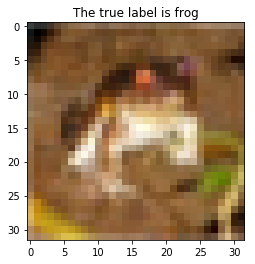

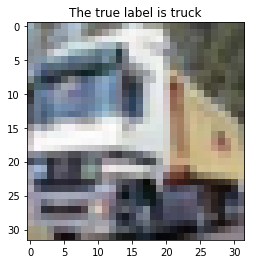

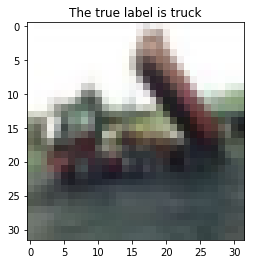

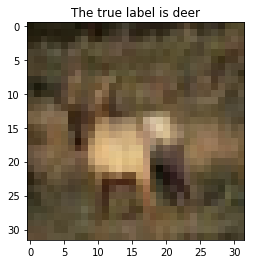

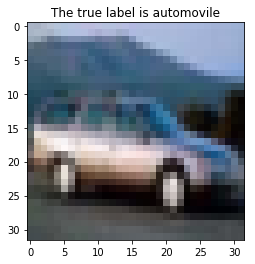

In [67]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# This is needed to know what each class means
label_id_to_class_name = {0:'airplane', 1:'automovile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 
                          6:'frog', 7:'horse', 8:'ship', 9:'truck'}

print(x_train.shape[0], 'Number of train samples')
print(x_test.shape[0], 'Number of test samples')
print('x_train shape:', x_train.shape)

# plot images
for image_id in range(0, 5):
    plt.imshow(x_train[image_id])
    plt.title("The true label is %s" % label_id_to_class_name[int(y_train[image_id])])
    plt.show()
    
# This makes sure the image has the correct order in the axis for Tensorflow, it would be different for Theano backend
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# Convert values to floats, originally they are integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Convert values of labels from 0 to 9 to categorical (one_hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

As these are 3D images, we cannot capture them using feedforward networks. As we reshape them into a 1D vector, we tend to lose a lot of features as we see above.

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation

In [75]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # Images are a 3D matrix, we have to flatten them to be 1D
model.add(Dense(1000, kernel_initializer='normal', activation='relu')) #kernel_initializer initializes W and B
model.add(Dropout(0.2)) # drop a unit with  50% probability.
model.add(Dense(700, kernel_initializer='orthogonal'))
model.add(Activation('sigmoid'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax')) # last layer, this has a softmax to do the classification

In [76]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=100, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 70s 2ms/step - loss: 2.3283 - acc: 0.1018 - val_loss: 2.3234 - val_acc: 0.0977
Epoch 2/10
40000/40000 [==============================] - 74s 2ms/step - loss: 2.3289 - acc: 0.0988 - val_loss: 2.3196 - val_acc: 0.1003
Epoch 3/10
40000/40000 [==============================] - 75s 2ms/step - loss: 2.3286 - acc: 0.0989 - val_loss: 2.3166 - val_acc: 0.1014
Epoch 4/10
40000/40000 [==============================] - 73s 2ms/step - loss: 2.3253 - acc: 0.0976 - val_loss: 2.3371 - val_acc: 0.1016
Epoch 5/10
40000/40000 [==============================] - 71s 2ms/step - loss: 2.3284 - acc: 0.1011 - val_loss: 2.3413 - val_acc: 0.1025
Epoch 6/10
40000/40000 [==============================] - 75s 2ms/step - loss: 2.3254 - acc: 0.1016 - val_loss: 2.3222 - val_acc: 0.0979
Epoch 7/10
40000/40000 [==============================] - 74s 2ms/step - loss: 2.3286 - acc: 0.1036 - val_loss: 2.3390 - val_acc

This does not work that good!